# Disciplina: Tópicos em Inteligência Computacional
*Instituto Federal do Norte de Minas Gerais Campus Montes Claros*

Curso: Ciência da Computação 

Professora: Luciana Balieiro Cosme

Equipe: Jaudir Aguiar, Jonas Diego, Matheus H. Aguiar 



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [33]:
filename = 'forestfires.csv'
floresta = pd.read_csv(filename,delimiter = ',')

In [34]:
floresta.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [35]:
floresta.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


In [72]:
floresta.columns[8:10]

Index(['temp', 'RH'], dtype='object')

In [73]:
X = floresta[floresta.columns[8:12]]
tam = int(len(X)*0.2)
X_t = X[:-tam]
X_v = X[-tam:]
y_t = floresta.area[:-tam]
y_v = floresta.area[-tam:]

In [74]:
regr = linear_model.LinearRegression()
# treina o modelo
regr.fit(X_t, y_t)

# faz a predição
y_pred = regr.predict(X_v)

In [75]:
# coeficientes a
print('Coeficientes: \n', regr.coef_)
#intercepto b
print('Coeficientes: \n', regr.intercept_)
#y = -0.01125053*HouseAge + 0.21172182*AveRooms + 2.9877014311533627

Coeficientes: 
 [  0.68440386  -0.12300136   0.22400895 -10.3550743 ]
Coeficientes: 
 3.3510061461746927


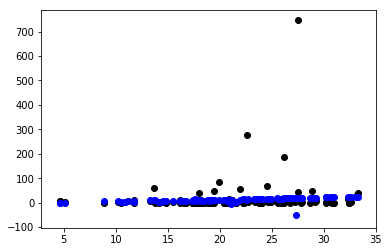

In [76]:
plt.scatter(X_v["temp"],y_v,color='black')
plt.scatter(X_v["temp"],y_pred,color='blue')